<a href="https://colab.research.google.com/github/axcel342/NLP_Labs/blob/main/Lab8a_Overview_of_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 8a: Overview of Transformers**

**Hugging Face Transformers** is a general-purpose library for loading, fine‑tuning, and running any transformer model (BERT, GPT, T5, etc.) on tasks like classification, token‑labeling, text generation, translation, summarization, and more. It gives you full access to model architectures, tokenizers, training loops, and pipelines for all standard NLP tasks.

**Sentence Transformers** is a specialized library built on top of Hugging Face Transformers, optimized for producing fixed‑size, semantically meaningful embeddings of sentences or short texts.

# **Objectives:**
This lab is designed to introduce students to fundamentals of HuggingFace library,
By the end of the lab, students will have hands-on experience with both traditional N-gram approaches and modern embedding techniques, equipping them with the tools needed for tackling complex NLP challenges.

1. Cosine Similarity
2. Sentence Transformers
3. Transformers
    * Dense Passage Retrieval
    * Image-Text Embedding
4. Basic Implementation of Transformers using PyTorch

## **Cosine Similarity**

**Cosine similarity** is used to compute similarity score between the query vector and the result vector. It's Range is **[-1, 1]**, but typically **[0, 1]** for normalized vectors.

*   Closer to 1 → Very similar
*   Closer to 0 → Unrelated
*   Negative values → Antonyms or inversely related

In [ ]:
import numpy as np

def calculate_cosine_similarity(sentence1, sentence2):
    # Create a set of unique words from both sentences
    word_set = set(sentence1.split() + sentence2.split())

    # Create vectors representing the frequency of each word in each sentence
    vector1 = np.array([sentence1.split().count(word) for word in word_set])
    vector2 = np.array([sentence2.split().count(word) for word in word_set])

    # Calculate the dot product of the two vectors
    dot_product = np.dot(vector1, vector2)

    # Calculate the magnitude of each vector
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)

    # Calculate the cosine similarity
    cosine_similarity = dot_product / (magnitude1 * magnitude2)

    return cosine_similarity

# Test the function
sentence1 = "The cat chased the mouse."
sentence2 = "The cat chased the mouse in the garden."
sentence3 = "The mouse chased the elephant in the garden."



The cosine similarity between the two sentences is: 0.7071067811865475


In [ ]:
similarity_score = calculate_cosine_similarity(sentence1, sentence2)
print(f"The cosine similarity between the two sentences is: {similarity_score}")

In [ ]:
similarity_score = calculate_cosine_similarity(sentence2, sentence3)
print(f"The cosine similarity between the two sentences is: {similarity_score}")

The cosine similarity between the two sentences is: 0.8999999999999998


## **Sentence Transformers**

**[Sentence Tranformers](https://huggingface.co/sentence-transformers)** is also sometimes called SBERT. The term **SBERT** comes from the original paper **“[Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/pdf/1908.10084)”** by **Reimers and Gurevych (2019)**. In that work, they adapted BERT into a Siamese (and triplet) network specifically to produce sentence embeddings.

Sentence Transformers:
- Provides pre‑trained, fine‑tuned checkpoints specifically for tasks like semantic similarity, clustering, or retrieval.

- Includes easy APIs (`model.encode()`) and training routines (siamese/triplet losses) tailored to embedding tasks.

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

​The model **BAAI/bge-base-en-v1.5** is a general-purpose English text embedding model developed by the **Beijing Academy of Artificial Intelligence (BAAI)**.

It is designed to transforms English text into **768-dimensional dense vector representations** or embeddings, which are particularly useful for tasks such as semantic search, information retrieval, and clustering.

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("BAAI/bge-base-en-v1.5")
#model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = [
    "it caught him off guard that space smelled of seared steak",
    "she could not decide between painting her teeth or brushing her nails",
    "he thought there'd be sufficient time is he hid his watch",
    "the bees decided to have a mutiny against their queen",
    "the sign said there was road work ahead so she decided to speed up",
    "on a scale of one to ten, what's your favorite flavor of color?",
    "flying stinging insects rebelled in opposition to the matriarch"
]

In [ ]:
len(sentences)

7

In [ ]:
# Converting the text into dense vector or embedding
embeddings = model.encode(sentences)
embeddings.shape

(7, 768)

In [ ]:
embeddings[0]

array([-3.11309975e-02, -6.33348245e-03, -3.15453261e-02, -9.38075595e-03,
        2.93191429e-02, -4.42197137e-02,  4.61156480e-03,  7.03319721e-03,
        2.35604998e-02, -2.24433467e-02, -7.09381187e-03,  7.69083295e-03,
       -2.86267065e-02, -1.05867488e-02,  4.92583960e-02,  5.61846495e-02,
        5.43212816e-02,  6.44918473e-04,  1.45956324e-02, -7.99637288e-03,
        3.19179296e-02,  1.43817738e-02,  1.94561817e-02,  4.02895212e-02,
        1.64064346e-03,  2.12156330e-03, -1.24322446e-02, -4.86925477e-03,
       -6.44296557e-02,  2.58044042e-02,  2.62061786e-02, -1.19880529e-03,
        8.56431108e-03, -8.14263821e-02,  3.10381991e-03,  2.83655571e-03,
       -1.34972483e-02, -3.67679447e-02, -3.28232273e-02,  5.16221523e-02,
       -5.78199029e-02,  6.28134385e-02,  5.80596225e-03,  4.21530865e-02,
       -2.54804902e-02,  2.08834726e-02, -4.08995599e-02, -1.11355660e-02,
       -2.49521043e-02, -2.69315969e-02, -1.93051305e-02, -2.66540032e-02,
        5.13588823e-02, -

In [ ]:
from sentence_transformers.util import cos_sim

scores = cos_sim(embeddings[0], embeddings[1:])

print(sentences[0])
for i, score in enumerate(scores[0]):
    print(f"{round(score.item(), 4)} | {sentences[i+1]}")

it caught him off guard that space smelled of seared steak
0.4394 | she could not decide between painting her teeth or brushing her nails
0.5773 | he thought there'd be sufficient time is he hid his watch
0.38 | the bees decided to have a mutiny against their queen
0.4003 | the sign said there was road work ahead so she decided to speed up
0.3709 | on a scale of one to ten, what's your favorite flavor of color?
0.3999 | flying stinging insects rebelled in opposition to the matriarch


### **Task: Compute Cosine Similarity of Sentence 1 with Sentence 2,3,4 using the function implemented from scratch, and the code block implemented using Sentence_Transformers, for the examples provided below**

Sentences to be used:
- Sentence 1: The boy ran upstairs
- Sentence 2: The girl ran upstairs
- Sentence 3: The cat ran upstairs
- Sentence 4: The cat ran outside

## **Transformers**

**[Hugging Face Transformers](https://huggingface.co/docs/transformers/en/index)** is an open-source library that provides state-of-the-art pre-trained models for Natural Language Processing (NLP) and beyond.


We can use Transformers to
1. Train models on our data,
2. Build inference applications
3. Generate text with large language models.


Transformers provides everything you need for inference or training with state-of-the-art pre-trained models!


### **Dense Passage Retrieval**

Here we will see an application of **Dense Passage Retrieval (DPR)**.
DPR basically encodes questions and a large set of candidate passages into vectors and then retrieves the most relevant passages via vector similarity.

In [ ]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer, DPRQuestionEncoder, DPRQuestionEncoderTokenizer
ctx_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

In [ ]:
questions = [
    "what is the capital city of australia?",
    "what is the best selling sci-fi book?",
    "how many searches are performed on Google?",
    "how many students are there in ML system design class?",
    "Why is the sky blue?"
]

contexts = [
    "canberra is the capital city of australia",
    "the capital city of france is paris",
    "sc-fi is a popular book genre read by millions",
    "the best-selling sci-fi book is dune",
    "Google serves more than 2 trillion queries annually",
    "Google is a popular search engine",
    "The number of students in ML System design class is 22"
]

In [ ]:
xb_tokens = ctx_tokenizer(contexts, max_length=256, padding='max_length',
                          truncation=True, return_tensors='pt')
xb = ctx_model(**xb_tokens)

xq_tokens = question_tokenizer(questions, max_length=256, padding='max_length',
                               truncation=True, return_tensors='pt')
xq = question_model(**xq_tokens)

In [ ]:
xb.pooler_output.shape, xq.pooler_output.shape

(torch.Size([7, 768]), torch.Size([5, 768]))

In [ ]:
import torch

for i, xq_vec in enumerate(xq.pooler_output):
    probs = cos_sim(xq_vec, xb.pooler_output)
    argmax = torch.argmax(probs)
    print(questions[i])
    print(contexts[argmax])
    print('---')

what is the capital city of australia?
canberra is the capital city of australia
---
what is the best selling sci-fi book?
the best-selling sci-fi book is dune
---
how many searches are performed on Google?
Google serves more than 2 trillion queries annually
---
how many students are there in ML system design class?
The number of students in ML System design class is 22
---
Why is the sky blue?
the best-selling sci-fi book is dune
---


### **Image-Text Embedding**
 Here we will see **[OpenAI’s CLIP model](https://openai.com/index/clip/)** to learn how to load images, pair them with a set of candidate captions, and pick which caption best matches each image.

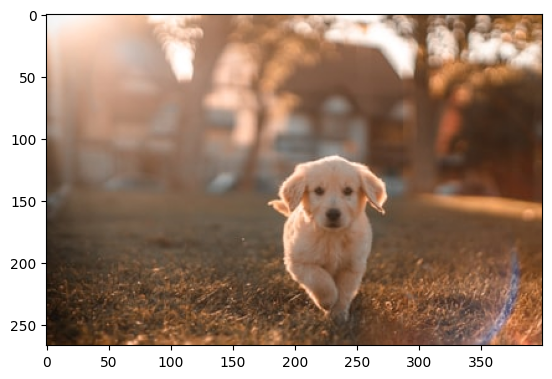

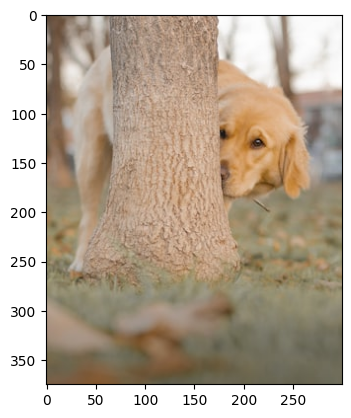

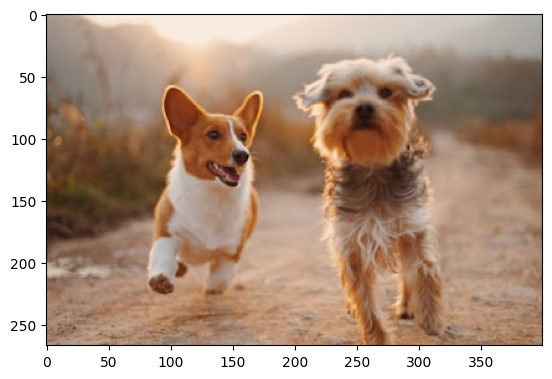

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests

urls = [
    "https://images.unsplash.com/photo-1576201836106-db1758fd1c97?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80",
    "https://images.unsplash.com/photo-1591294100785-81d39c061468?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=300&q=80",
    "https://images.unsplash.com/photo-1548199973-03cce0bbc87b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=400&q=80"
]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]

# let's see what we have
for image in images:
    plt.show(plt.imshow(np.asarray(image)))

In [ ]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
captions = ["a dog hiding behind a tree",
            "two dogs running",
            "a dog running",
            "a cucumber on a tree",
            "trees in the park",
            "a cucumber dog"]
inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)

outputs = model(**inputs)

probs = outputs.logits_per_image.argmax(dim=1)
probs

tensor([2, 0, 1])

a dog running


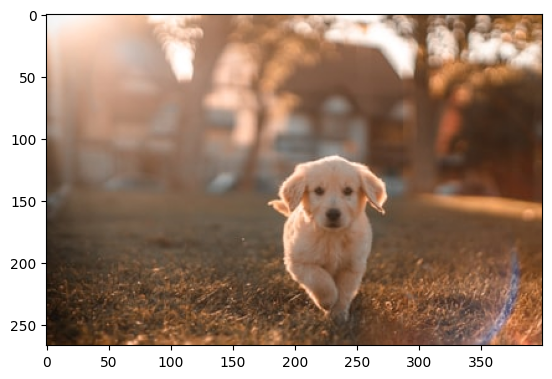

a dog hiding behind a tree


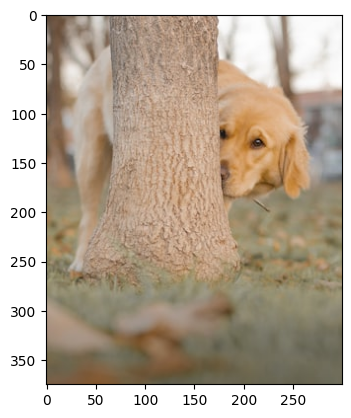

two dogs running


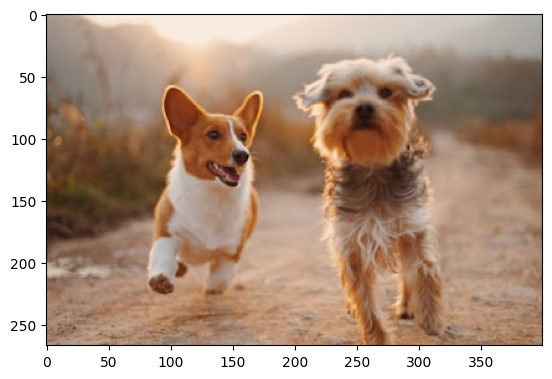

In [ ]:
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(captions[argmax])
    plt.show(plt.imshow(np.asarray(image)))

## **Basic Implementation of Transformers using PyTorch**

This code illustrates the **core math and data flow** of a transformer’s encoder and decoder layers, by implementing it using PyTorch.

### **Task: Run the complete code (for Transformer's basic implementation) after completing the missing code statements, using the hints provided:**


Importing the PyTorch library and it's relevant modules

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

The `ScaledDotProductAttention` module
computes
$$
\mathrm{Attention}(Q, K, V) = \mathrm{softmax}\!\Bigl(\frac{QK^\mathsf{T}}{\sqrt{d_k}}\Bigr)\,V
$$

and applies an optional mask (for causal decoding).

In [ ]:
class ScaledDotProductAttention(nn.Module):
  """
  Computes Attention, and applies an optional mask (for casual decodin)
  """
  def __init__(self, d_k):
      super().__init__()
      self.scale = 1.0 / (d_k ** 0.5)

  def forward(self, Q, K, V, mask=None):

      # 1) Compute raw attention scores: QK^T
      scores =                                   # [..., seq_q, seq_k]


      # 2) Scale
      scores =


      # 3) Mask (for decoder self-attn)
      if mask is not None:
          scores =


      # 4) Softmax
      attn =


      # 5) Weighted sum
      out =                                       # [..., seq_q, d_v]


      return out, attn

The `MultiHeadAttention` module projects inputs into query/key/value, splits into multiple “heads,” runs parallel attention, then concatenates.

In [ ]:
class MultiHeadAttention(nn.Module):
  """
  Projects inputs into query/key/value, splits into multiple “heads,”
  runs parallel attention, then concatenates.
  """
  def __init__(self, d_model, num_heads):
      super().__init__()
      assert d_model % num_heads == 0
      self.h = num_heads
      self.d_k = self.d_v = d_model // num_heads
      self.Wq = nn.Linear(d_model, d_model)
      self.Wk = nn.Linear(d_model, d_model)
      self.Wv = nn.Linear(d_model, d_model)
      self.fc = nn.Linear(d_model, d_model)
      self.attn = ScaledDotProductAttention(self.d_k)

  def forward(self, x, memory=None, mask=None):
      # If memory is None, self-attention; else cross-attention
      K_src = V_src = x if memory is None else memory
      Q = self.Wq(x)
      K = self.Wk(K_src)
      V = self.Wv(V_src)

      # Split into h heads and compute attention in parallel
      batch_size = x.size(0)

      def split_heads(tensor):
          return tensor.view(batch_size, -1, self.h, self.d_k).transpose(1,2)

      # Split into h heads and compute attention in parallel
      Qh, Kh, Vh =

      # Apply attention on each head
      out, attn =                              # out: [batch_size, h, seq, d_k]

      # Concatenate heads
      out = out.transpose(1,2).contiguous().view(batch_size, -1, self.h*self.d_k)
      return self.fc(out), attn


The `SimpleTransformerLayer` module has 2 parts:

Encoder part:
  - one self‑attention + residual + norm


Decoder part:
  - masked self‑attention
  - cross‑attention over encoder outputs
  - feed‑forward network each with residual connections and layer norms.

In [ ]:
class SimpleTransformerLayer(nn.Module):

  def __init__(self, d_model=32, num_heads=4, d_ff=64, dropout=0.1):
      super().__init__()
      self.self_attn = MultiHeadAttention(d_model, num_heads)
      self.cross_attn = MultiHeadAttention(d_model, num_heads)
      self.ff = nn.Sequential(
          nn.Linear(d_model, d_ff),
          nn.ReLU(),
          nn.Linear(d_ff, d_model)
      )
      self.norm1 = nn.LayerNorm(d_model)
      self.norm2 = nn.LayerNorm(d_model)
      self.norm3 = nn.LayerNorm(d_model)
      self.drop = nn.Dropout(dropout)

  def forward(self, enc_input, dec_input, src_mask=None, tgt_mask=None):
    # Encoder self-attention
    enc_out, _ = self.self_attn(enc_input, mask=src_mask)
    enc_out = self.norm1(enc_input + self.drop(enc_out))

    # Decoder masked self-attention
    dec_out, _ = self.self_attn(dec_input, mask=tgt_mask)
    dec_out = self.norm2(dec_input + self.drop(dec_out))

    # Decoder cross-attention over encoder outputs
    cross_out, _ = self.cross_attn(dec_out, memory=enc_out)
    dec_out = self.norm3(dec_out + self.drop(cross_out))

    # Feed‑forward (applied only in decoder here for brevity)
    ff_out = self.ff(dec_out)
    return dec_out + self.drop(ff_out)

For running the `SingleTranformerLayer` on sample outputs, this code chunk:
- Creates random “encoder” and “decoder” inputs.
- Builds a causal mask for the decoder (lower‑triangular).
- Runs one forward pass, yielding a tensor of shape (2,5,32).

In [ ]:
# Demo: toy inputs
batch, seq_len, d_model = 2, 5, 32
enc_input = torch.rand(batch, seq_len, d_model)
dec_input = torch.rand(batch, seq_len, d_model)

# Masks (1 = keep, 0 = mask). For decoder, use a causal mask:
tgt_mask = torch.tril(torch.ones(seq_len, seq_len)).bool()

layer = SimpleTransformerLayer(d_model=d_model)
output = layer(enc_input, dec_input, src_mask=None, tgt_mask=tgt_mask)

print("Output shape:", output.shape)  # (batch, seq_len, d_model)